ANALISIS SENTIMEN PADA ULASAN PRODUK DI TIKTOK SHOP MENGGUNAKAN METODE NATURAL KANGUANGE PROCESSING (NLP) 

Introduction:
Mohammad Satria Zacky Mudzaffar

Dataset : TikTok_analysis/Reviews.csv

Membaca Dataset dan Menampilkan Data Awal

In [1]:
import pandas as pd

# Load CSV
df = pd.read_csv("Reviews.csv")

# Lihat 5 data awal
df.head()


,Produk,Ulasan,Rating,Tanggal
0,Sepatu Running,Sangat bagus dan ukurannya sesuai,5,2024-10-14
1,G2G Peeling Solution,"Niat nya coba-coba, Alhamdulillah cocok",5,2025-02-08
2,Shacket Jaket,Ada jahitan yang ga rapi,4,2025-03-19
3,Azarine Sunscreen,cocok di muka yang sensitif,5,04-10
4,T-Shirt Polos,"Pengemasan lama, jahitan rapi, bahan tipis",4,2025-04-10


 Informasi Struktur Data dan Deteksi Nilai Kosong

In [2]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Produk   12 non-null     object
 1   Ulasan   12 non-null     object
 2   Rating   12 non-null     int64 
 3   Tanggal  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 512.0+ bytes
None
Produk     0
Ulasan     0
Rating     0
Tanggal    0
dtype: int64


Mengunduh Resource NLTK untuk Pemrosesan Teks

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')  # Untuk analisis sentimen


[nltk_data] Downloading package punkt to C:\Users\Hype
[nltk_data]     GLK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Hype
[nltk_data]     GLK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Hype
[nltk_data]     GLK\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

 Melihat Contoh Ulasan dan Memeriksa Tipe Datanya

In [7]:
print(df["Ulasan"].head(10))
print(df["Ulasan"].apply(type).unique())


0                  Sangat bagus dan ukurannya sesuai
1            Niat nya coba-coba, Alhamdulillah cocok
2                           Ada jahitan yang ga rapi
3                        cocok di muka yang sensitif
4         Pengemasan lama, jahitan rapi, bahan tipis
5       Kurang tahan lama, wajar dengan harga segitu
6                        keren bagus banget aku suka
7    Kecewa banget, saya pesan hitam yg datang putih
8                                    Gamau nyala kak
9            ga expect sebagus ini woi bahannya adem
Name: Ulasan, dtype: object
[<class 'str'>]


Membaca Dataset dari Jalur Lokal dan Menampilkan Informasi Awal

In [14]:
import pandas as pd

# Cara aman: pakai r-string
df = pd.read_csv(r"C:\Users\Hype GLK\Tiktok_analysis\Reviews.csv")

# Cek data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Produk   12 non-null     object
 1   Ulasan   12 non-null     object
 2   Rating   12 non-null     int64 
 3   Tanggal  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 512.0+ bytes
None
                 Produk                                      Ulasan  Rating  \
0        Sepatu Running           Sangat bagus dan ukurannya sesuai       5   
1  G2G Peeling Solution     Niat nya coba-coba, Alhamdulillah cocok       5   
2         Shacket Jaket                    Ada jahitan yang ga rapi       4   
3     Azarine Sunscreen                 cocok di muka yang sensitif       5   
4         T-Shirt Polos  Pengemasan lama, jahitan rapi, bahan tipis       4   

      Tanggal  
0  2024-10-14  
1  2025-02-08  
2  2025-03-19  
3       04-10  
4  2025-04-10  


Analisis Sentimen Ulasan Produk TikTok
1. Membaca Data: Dataset Reviews.csv dibaca menggunakan pandas untuk dianalisis.
2. Penerjemahan otomatis ulasan ke Bahasa Inggris: Menggunakan Google Translator dari deep_translator untuk menerjemahkan kolom Ulasan ke dalam bahasa Inggris agar analisis sentimen lebih akurat.
3. Analisis Sentimen dengan VADER: Menggunakan VADER Sentiment Analyzer dari NLTK untuk menghitung skor sentimen dari setiap ulasan yang sudah diterjemahkan. VADER memberikan skor compound yang menunjukkan seberapa positif, negatif, atau netralnya teks tersebut.
4. Pemberian Label Sentimen: Berdasarkan skor sentimen, kita memberi label:
    Positif untuk skor ≥ 0.05
    Negatif untuk skor ≤ -0.05
    Netral untuk skor antara -0.05 dan 0.05.
5. Visualisasi Distribusi Sentimen: Diagram batang digunakan untuk menunjukkan distribusi kategori sentimen di seluruh dataset.

[nltk_data] Downloading package vader_lexicon to C:\Users\Hype
[nltk_data]     GLK\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               Ulasan  \
0                   Sangat bagus dan ukurannya sesuai   
1             Niat nya coba-coba, Alhamdulillah cocok   
2                            Ada jahitan yang ga rapi   
3                         cocok di muka yang sensitif   
4          Pengemasan lama, jahitan rapi, bahan tipis   
5        Kurang tahan lama, wajar dengan harga segitu   
6                         keren bagus banget aku suka   
7     Kecewa banget, saya pesan hitam yg datang putih   
8                                     Gamau nyala kak   
9             ga expect sebagus ini woi bahannya adem   
10                         kado sesuai bagus bahannya   
11  modelnya bagus tapi talinya copot pas baru nyampe   

                                       Ulasan_English  sentiment_score  \
0               Very good and the size is appropriate           0.4927   
1       The intention is to try, thank God it matches           0.5574   
2                  There is a stitch

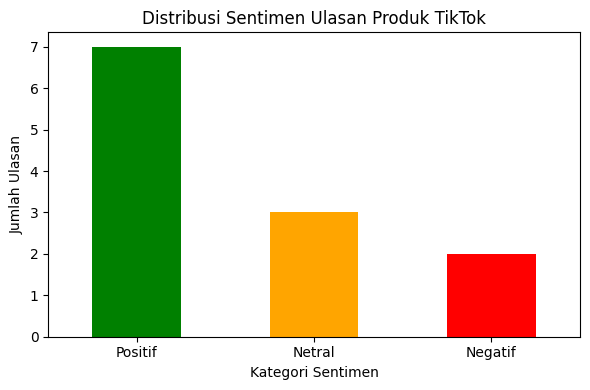

In [15]:
# Import library
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt

# Download resource untuk NLTK
nltk.download('vader_lexicon')
# Baca data CSV
df = pd.read_csv(r"C:\Users\Hype GLK\Tiktok_analysis\Reviews.csv")
# Terjemahkan ulasan ke bahasa Inggris
df["Ulasan_English"] = df["Ulasan"].apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x))
# Inisialisasi VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# Hitung skor sentimen
df["sentiment_score"] = df["Ulasan_English"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
# Fungsi untuk memberi label berdasarkan skor
def label_sentiment(score):
    if score >= 0.05:
        return "Positif"
    elif score <= -0.05:
        return "Negatif"
    else:
        return "Netral"
# Tambahkan kolom label sentimen
df["sentiment_label"] = df["sentiment_score"].apply(label_sentiment)
# Tampilkan hasil
print(df[["Ulasan", "Ulasan_English", "sentiment_score", "sentiment_label"]])

# Buat diagram batang
sentiment_counts = df["sentiment_label"].value_counts()

plt.figure(figsize=(6, 4))
colors = ['green', 'orange', 'red']
sentiment_counts.plot(kind='bar', color=colors)
plt.title("Distribusi Sentimen Ulasan Produk TikTok")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
